In [5]:
def extract_data(ad, ad_detail):
    try:
        price = ad.select_one("data").get("value").strip()
    except:
        price = None

    try:
        title = ad.select_one("h2").text.strip()
    except:
        title = None
    
    try:
        category = ad.find("span", class_="truncate text-3xs md:text-xs lg:text-xs w-3/5 font-medium text-neutral-500").text.strip()
    except:
        category = None

    try:
        city_time = ad.find("span", class_="line-clamp-1 truncate text-3xs md:text-xs lg:text-xs w-3/5 font-medium text-neutral-500").text.strip()
        city_time=city_time.split(",")
        city = city_time[0].strip()
        time = city_time[1].strip()
    except:
        city = None
        time = None
    
    try:
        description = ad_detail.select_one("p.text-sm.text-start.text-gray-700.font-arabic.whitespace-pre-line.line-clamp-3").text.strip()
    except:
        description = None
    
    try:
        criterias = ad_detail.select_one("ul.grid.gap-3.grid-cols-12")
        criterias = criterias.find_all("li",class_="col-span-6 lg:col-span-3")
        superficie, transType, bains, chambres = None, None, None, None
        for criteria in criterias:
            label = criteria.find("span", class_="text-gray-600/80 text-2xs md:text-xs lg:text-xs font-medium pb-1 truncate").text.strip()
            value = criteria.find("span", class_="text-gray-700/80 text-xs md:text-sm lg:text-sm font-semibold").text.strip()
            if "Superficie" in label:
                superficie = value
            elif "Type de transaction" in label:
                transType = value
            elif "Salles de bains" in label:
                bains = value
            elif "Chambres" in label:
                chambres = value
    except:
        superficie = None
        transType = None
        bains = None
        chambres = None
    
    return {
        "price": price,
        "title": title,
        "category": category,
        "city": city,
        "time": time,
        "description": description,
        "superficie": superficie,
        "transType": transType,
        "bains": bains,
        "chambres": chambres
    }


In [56]:
print("text-gray-700/80 text-xs md:text-sm lg:text-sm font-semibold".replace(" ", "."))
print("col-span-12.pl-4.md:pl-3.pr-6.lg:pl-6.lg:col-[_span_12_/_span_9]".replace(".", " "))

text-gray-700/80.text-xs.md:text-sm.lg:text-sm.font-semibold
col-span-12 pl-4 md:pl-3 pr-6 lg:pl-6 lg:col-[_span_12_/_span_9]


In [4]:
all_ads = []

In [7]:
import requests
from bs4 import BeautifulSoup
import time
import tqdm


headers = {"User-Agent": "Mozilla/5.0"}

for page in tqdm.trange(1, 51):  # ✅ 5 pages = ~150 annonces
    print(f"Scraping page {page}...")
    
    base_url = f"https://www.tayara.tn"
    page_suffix = f"/listing/c/Immobilier/?page={page}"
    response = requests.get(base_url + page_suffix, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    
    ads = soup.select("div.pb-2.px-3.z-10.flex-none")  # classes communes
    #print(ads)
    i=0
    
    for ad in tqdm.tqdm(ads):
        # extraction des infos
        #print(f"Scraping ad {i+1}...")
        i+=1
        parent_a = ad.find_parent("a")
        link = parent_a.get("href") if parent_a else None
        link = base_url+link
        response_detail = requests.get(link, headers=headers)
        #print(f"Scraping detail page: {link}")
        #print(f"response_detail.status_code: {response_detail.status_code}, content: {response_detail.content[:100]}")  # Debug line
        soup_detail = BeautifulSoup(response_detail.text, "html.parser")
        #print(f"soup_detail: {soup_detail}")
        ad_detail = soup_detail.find("div",class_="col-span-12")  # classe commune de la page detail0
        #print(f"ad_detail: {ad_detail}")
        all_ads.append(extract_data(ad,ad_detail))
        time.sleep(3)
    
    time.sleep(4)  # ✅ important (anti-blocage)

  0%|          | 0/50 [00:00<?, ?it/s]

Scraping page 1...


  2%|▏         | 1/50 [01:45<1:25:48, 105.07s/it]

Scraping page 2...


  4%|▍         | 2/50 [03:33<1:25:50, 107.31s/it]

Scraping page 3...


  6%|▌         | 3/50 [05:22<1:24:27, 107.83s/it]

Scraping page 4...


  8%|▊         | 4/50 [07:09<1:22:30, 107.62s/it]

Scraping page 5...


 10%|█         | 5/50 [08:57<1:20:48, 107.75s/it]

Scraping page 6...


 12%|█▏        | 6/50 [10:45<1:19:03, 107.81s/it]

Scraping page 7...


 14%|█▍        | 7/50 [12:32<1:17:09, 107.67s/it]

Scraping page 8...


 16%|█▌        | 8/50 [14:19<1:15:10, 107.39s/it]

Scraping page 9...


 18%|█▊        | 9/50 [16:07<1:13:23, 107.41s/it]

Scraping page 10...


 20%|██        | 10/50 [17:55<1:11:43, 107.60s/it]

Scraping page 11...


 22%|██▏       | 11/50 [19:42<1:09:54, 107.55s/it]

Scraping page 12...


 24%|██▍       | 12/50 [21:29<1:08:02, 107.44s/it]

Scraping page 13...


 26%|██▌       | 13/50 [23:17<1:06:22, 107.63s/it]

Scraping page 14...


 28%|██▊       | 14/50 [25:23<1:07:48, 113.01s/it]

Scraping page 15...


 30%|███       | 15/50 [27:11<1:04:59, 111.41s/it]

Scraping page 16...


 32%|███▏      | 16/50 [28:56<1:02:10, 109.73s/it]

Scraping page 17...


 34%|███▍      | 17/50 [30:44<59:57, 109.03s/it]  

Scraping page 18...


 36%|███▌      | 18/50 [32:32<58:03, 108.85s/it]

Scraping page 19...


 38%|███▊      | 19/50 [34:38<58:52, 113.96s/it]

Scraping page 20...


 40%|████      | 20/50 [36:27<56:12, 112.43s/it]

Scraping page 21...


 42%|████▏     | 21/50 [38:14<53:33, 110.82s/it]

Scraping page 22...


 44%|████▍     | 22/50 [40:00<51:01, 109.33s/it]

Scraping page 23...


 46%|████▌     | 23/50 [41:46<48:45, 108.34s/it]

Scraping page 24...


 48%|████▊     | 24/50 [43:38<47:26, 109.48s/it]

Scraping page 25...


 50%|█████     | 25/50 [45:27<45:30, 109.21s/it]

Scraping page 26...


 52%|█████▏    | 26/50 [47:13<43:19, 108.32s/it]

Scraping page 27...


 54%|█████▍    | 27/50 [48:59<41:14, 107.58s/it]

Scraping page 28...


 56%|█████▌    | 28/50 [50:45<39:18, 107.19s/it]

Scraping page 29...


 58%|█████▊    | 29/50 [52:31<37:23, 106.81s/it]

Scraping page 30...


 60%|██████    | 30/50 [54:18<35:39, 106.96s/it]

Scraping page 31...


 62%|██████▏   | 31/50 [56:04<33:45, 106.62s/it]

Scraping page 32...


 64%|██████▍   | 32/50 [58:04<33:08, 110.47s/it]

Scraping page 33...


 66%|██████▌   | 33/50 [59:51<31:04, 109.65s/it]

Scraping page 34...


 68%|██████▊   | 34/50 [1:01:38<28:58, 108.63s/it]

Scraping page 35...


 70%|███████   | 35/50 [1:03:24<26:59, 107.97s/it]

Scraping page 36...


 72%|███████▏  | 36/50 [1:05:11<25:06, 107.63s/it]

Scraping page 37...


 74%|███████▍  | 37/50 [1:06:58<23:15, 107.38s/it]

Scraping page 38...


 76%|███████▌  | 38/50 [1:08:43<21:22, 106.86s/it]

Scraping page 39...


 78%|███████▊  | 39/50 [1:10:29<19:32, 106.63s/it]

Scraping page 40...


 80%|████████  | 40/50 [1:12:14<17:40, 106.03s/it]

Scraping page 41...


 82%|████████▏ | 41/50 [1:13:58<15:49, 105.51s/it]

Scraping page 42...


 84%|████████▍ | 42/50 [1:15:44<14:03, 105.45s/it]

Scraping page 43...


 86%|████████▌ | 43/50 [1:17:30<12:19, 105.71s/it]

Scraping page 44...


 88%|████████▊ | 44/50 [1:19:15<10:33, 105.56s/it]

Scraping page 45...


 90%|█████████ | 45/50 [1:21:00<08:46, 105.33s/it]

Scraping page 46...


 92%|█████████▏| 46/50 [1:22:45<07:01, 105.42s/it]

Scraping page 47...


 94%|█████████▍| 47/50 [1:24:33<05:18, 106.01s/it]

Scraping page 48...


 96%|█████████▌| 48/50 [1:26:18<03:31, 105.81s/it]

Scraping page 49...


 98%|█████████▊| 49/50 [1:28:03<01:45, 105.54s/it]

Scraping page 50...


100%|██████████| 50/50 [1:29:48<00:00, 107.77s/it]


In [45]:
parent_a = ads[0].find_parent("a")
link = parent_a.get("href") if parent_a else None
link

'/item/appartements/monastir/monastir/appartement/69343672cd04d08be7466720/'

In [8]:
print(f"Total ads scraped: {len(all_ads)}")
print(len(ads))

Total ads scraped: 1525
30


In [9]:
import pandas as pd

df = pd.DataFrame(all_ads)
print(df.shape)
df


(1525, 10)


,price,title,category,city,time,description,superficie,transType,bains,chambres
0,1200,Appartement s+3 à louer à cité sahafa,Appartements,Ariana,3 minutes ago,JUST ON TIME IMMO met à votre disposition pour...,152,À Louer,0,3
1,1000,terrain à vendre à riadh landalous,Terrains et Fermes,Ariana,3 minutes ago,JUST ON TIME IMMO met à votre disposition un t...,None,None,None,None
2,None,Espace industriel à Ben Arous- 93974850,"Magasins, Commerces et Locaux industriels",Ben Arous,4 minutes ago,"À louer, un espace ouvert situé au centre de B...",1200,À Louer,4,2
3,1200,Appartement S+2 à louer à cité el ghazela,Appartements,tunis,4 minutes ago,JUST ON TIME IMMO met à votre disposition un a...,122,À Louer,0,2
4,1340,Appartement S+3 à louer à cité nkhilette,Appartements,Ariana,5 minutes ago,JUST ON TIME IMMO met à votre disposition pour...,136,À Louer,0,3
...,...,...,...,...,...,...,...,...,...,...
1520,350000,Terrain de 451 m² à Borj Cedria,Terrains et Fermes,Ben Arous,a day ago,Terrain de 451 m² à Borj Cedria; lotissement d...,None,None,None,None
1521,145000,Terrain de 315 m² à Borj Cedria,Terrains et Fermes,Nabeul,a day ago,"Terrain de 315 m² à Borj Cedria, situé à lotis...",None,None,None,None
1522,268000,Terrain de 429 m² à Borj Cedria,Terrains et Fermes,Ben Arous,a day ago,"Terrain de 429 m² à Borj Cedria, lotissement d...",None,None,None,None
1523,400,loyer studio meuble S1 bardo 2 coter ranim po...,Colocations,tunis,a day ago,A loyer un studio sise au bardo 2 derrière bou...,50,None,1,2


# Réduire le travail pour la catégorie appartements et les biens a louer au lieu de vendre

In [14]:

df_new = df[
    (df["category"] == "Appartements") &
    (df["transType"] == "À Louer")
]
# suppression des doublons
df_new = df_new.drop_duplicates()
print(df_new.shape)

(447, 10)


In [145]:
df_new

,price,title,category,city,time,description,superficie,transType,bains,chambres
6,240000,appartement à vendre,Appartements,Sousse,a few seconds ago,REMAX masters vous propose un appartement S+2 ...,94,À Vendre,2,2
10,330000,DEUX APPTS S+2 A DAR FADHAL,Appartements,tunis,5 minutes ago,A vendre deux Appartements S+2 au RDC et au 1e...,230,À Vendre,2,4
24,390000,APPT S+2 PRES L'EGLISE L'AOUINA,Appartements,Tunis,24 minutes ago,A vendre un spacieux appartement S+2 HTS au cœ...,120,À Vendre,2,2
43,370000,ENNASR 2: APPARTEMENT S+2 À VENDRE,Appartements,Ariana,32 minutes ago,📍ENNASR 2: APPARTEMENT S+2 À VENDRE \n\nL’agen...,130,À Vendre,2,2
45,195000,MENZAH 7 BIS: APPARTEMENT S+1 À VENDRE,Appartements,Ariana,34 minutes ago,📍MENZAH 7 BIS: APPARTEMENT S+1 À VENDRE \n\nL’...,1,À Vendre,1,1
...,...,...,...,...,...,...,...,...,...,...
4420,210000,S+1 de très haut standing à Vendre au RDC dans...,Appartements,Nabeul,11 days ago,City Casa vous propose \nS+1 de très haut stan...,53.5,À Vendre,1,-1
4429,None,A VENDRE S+2 à AIN ZAGHOUEN,Appartements,Tunis,11 days ago,📞 Afficher le numéro📞,65,À Vendre,1,2
4432,440000,S+2 de Luxe Vue piscine dans une résidence ave...,Appartements,Nabeul,11 days ago,Remise des clés 2026 \n\nS+2 de Luxe Vue pisci...,426,À Vendre,1,2
4434,340000,🏡 À vendre – Bel appartement S+3 à Menzah 7,Appartements,Ariana,11 days ago,IB-4625\n🏡 À vendre – Bel appartement S+3 à Me...,136,À Vendre,2,3


In [47]:
df_new.to_csv("immobilier.csv", index=False)

In [16]:
print(df_new.columns)

Index(['price', 'title', 'category', 'city', 'time', 'description',
       'superficie', 'transType', 'bains', 'chambres'],
      dtype='object')


In [26]:
import numpy as np

df_new = df_new.replace({None: np.nan})
print(df_new.isna().sum())

price          24
title           0
city            0
time            0
description     0
superficie     30
bains           2
chambres        2
dtype: int64


In [9]:
ads = soup.select("div.pb-2.px-3.z-10.flex-none")
print(len(ads))

30


In [20]:
df_new_backup = df_new.copy()

In [42]:
df_new.dropna(subset=["price"], inplace=True)
df_new.shape

(425, 8)

In [22]:
df_new.shape

(447, 8)

In [23]:
df_new[df_new.isna().any(axis=1)]

,price,title,city,time,description,superficie,bains,chambres
23,None,A louer Un appartement S+2 Meublé Début Bhira ...,Bizerte,29 minutes ago,Pour longue durée\n\nA louer Un appartement S+...,1,1,2
51,None,A louer Un appartement S+2 Meublé Début Bhira ...,Bizerte,31 minutes ago,Pour longue durée\n\nA louer Un appartement S+...,1,1,2
68,1249,ALOUER S2 à Khzema,Sousse,an hour ago,À Louer – Appartement S+2 richement meublé à K...,None,1,2
137,1650,À LOUER | S+1 Domotique intelligente Haut Stan...,Tunis,an hour ago,À LOUER | S+1 Domotique intelligente Haut Stan...,None,1,1
139,1380,🏡 À LOUER | S+1 Bien Meublé – Nouvelle Soukra,Tunis,an hour ago,🏡 À LOUER | S+1 Bien Meublé – Nouvelle Soukra\...,None,1,1
141,1150,À Louer – S+1 avec Terrasse – Nouvelle Soukra 💰,Tunis,an hour ago,À Louer – S+1 avec Terrasse – Nouvelle Soukra\...,None,1,0
144,1100,A louer s+1 jamais habité nouvelle soukra avec...,tunis,an hour ago,A louer s+1 jamais habité nouvelle soukra avec...,None,1,1
173,None,"A louer Appartement S+2 à AFH Mrezga , Cité El...",Nabeul,2 hours ago,L’agence immobilière Le Boulevard vous propose...,115,1,0
177,None,"A louer appartement S+1 à AFH Mrezga, Hammamet",Nabeul,2 hours ago,L’agence immobilière Le Boulevard vous propose...,85,1,1
191,None,✨ À louer | S+2 jamais habité – Résidence R+2 ✨,Tunis,2 hours ago,✨ À louer | S+2 jamais habité – Résidence R+2 ...,None,2,2


In [32]:
import re

def extract_price_from_text(text):
    if not isinstance(text, str):
        return None
    
    pattern = r"(\d[\d\s\.]{0,15})\s*(k|dt|dinar|dinars|milles dinars|milles|mille|dinar tunisien|dinars tunisiens|د|ألف دينار)"  # Added 'm' and 'md' for million and thousand
    
    #pattern = r"(\d[\d\s\.]{0,15})\s*(k|m|md|dt|mdt|mt|dinar|dinars|dinar tunisien|dinars tunisiens|د|م|مليون|ألف دينار)"
    
    match = re.search(pattern, text, flags=re.IGNORECASE)
    
    if match:
        number = match.group(1)
        number = number.replace(" ", "").replace(".", "")
        
        try:
            return float(number)
        except:
            return None
    
    return None

In [27]:
df_new[df_new["price"].isna()]

,price,title,city,time,description,superficie,bains,chambres
23,NaN,A louer Un appartement S+2 Meublé Début Bhira ...,Bizerte,29 minutes ago,Pour longue durée\n\nA louer Un appartement S+...,1,1,2
51,NaN,A louer Un appartement S+2 Meublé Début Bhira ...,Bizerte,31 minutes ago,Pour longue durée\n\nA louer Un appartement S+...,1,1,2
173,NaN,"A louer Appartement S+2 à AFH Mrezga , Cité El...",Nabeul,2 hours ago,L’agence immobilière Le Boulevard vous propose...,115,1,0
177,NaN,"A louer appartement S+1 à AFH Mrezga, Hammamet",Nabeul,2 hours ago,L’agence immobilière Le Boulevard vous propose...,85,1,1
191,NaN,✨ À louer | S+2 jamais habité – Résidence R+2 ✨,Tunis,2 hours ago,✨ À louer | S+2 jamais habité – Résidence R+2 ...,NaN,2,2
398,NaN,📍 Riadh el Andalous à Louer spacieux appt S+3,tunis,4 hours ago,🏠 𝐑𝐈𝐀𝐃𝐇 𝐄𝐋 𝐀𝐍𝐃𝐀𝐋𝐎𝐔𝐒 ; à 𝐥𝐨𝐮𝐞𝐫 spacieux 𝐚𝐩𝐩𝐭 𝐒+...,160,2,3
410,NaN,vue sur mer presque pied dans l'eau a skanes p...,Monastir,4 hours ago,vue sur mer presque pied dans l'eau a skanes p...,120,2,2
628,NaN,Très bel S2 a ain ZAGHOUAN,Tunis,7 hours ago,Immo + vous propose Appartement S2 à Ain zagho...,160,2,3
768,NaN,🏠 𝐌𝐞𝐧𝐳𝐚𝐡 9C ; à Louer Spacieux appt 𝐒+2 bien ...,Tunis,8 hours ago,🏠 𝐌𝐞𝐧𝐳𝐚𝐡 9C ; à Louer Spacieux appt 𝐒+2 bien ...,100,1,2
825,NaN,A louer,Monastir,8 hours ago,Agence Les Arcades met en location 🔑 un magnif...,70,1,1


In [41]:
# verification des annonces sans prix
nan_prices = df_new[df_new["price"].isna()]
titles = nan_prices["title"].tolist()
descriptions = nan_prices["description"].tolist()
for title, description in zip(titles, descriptions):
    combined_text = f"{title} {description}"
    extracted_price = extract_price_from_text(combined_text)
    print(f"Title: {title}\n Description: {description}\n Extracted Price: {extracted_price}\n \n --------------------------------------")

Title: A louer Un appartement S+2 Meublé Début Bhira , Bizerte
 Description: Pour longue durée

A louer Un appartement S+2 Meublé Début Bhira , Bizerte

 Afficher le numéro / Afficher le numéro // Afficher le numéro

Whatsapp Afficher le numéro
 Extracted Price: None
 
 --------------------------------------
Title: A louer Un appartement S+2 Meublé Début Bhira , Bizerte
 Description: Pour longue durée

A louer Un appartement S+2 Meublé Début Bhira , Bizerte

 Afficher le numéro / Afficher le numéro // Afficher le numéro

Whatsapp Afficher le numéro
 Extracted Price: None
 
 --------------------------------------
Title: A louer Appartement S+2 à AFH Mrezga , Cité El Wafa
 Description: L’agence immobilière Le Boulevard vous propose :
    #Location- par nuitée                 #Référence : 1004a
Un appartement S+2 haut standing dans une résidence bien sécurisée à AFH Mrezge, Cité El wafa, Nabeul.
Il se compose d'un salon avec balcon, 2 chambres à coucher avec dressing, salle d’eau, une cui

In [33]:
nan_prices = df_new[df_new["price"].isna()]
nan_prices["extracted_price"] = nan_prices[["title","description"]].apply(lambda x: extract_price_from_text(" ".join(x)), axis=1)
nan_prices.isna().sum()
#print(nan_prices[nan_prices["extracted_price"].isna()==False]["description"][2777])
#print(nan_prices[nan_prices["extracted_price"].isna()==False])
ady = nan_prices[(nan_prices["extracted_price"].isna()==False)]
ext = nan_prices[(nan_prices["extracted_price"].isna()==False) & (nan_prices["extracted_price"]>40)]
int = nan_prices[(nan_prices["extracted_price"].isna()==False) & (nan_prices["extracted_price"]<=40)]
mask = ~nan_prices.isin(ady)
beki = nan_prices[mask.all(axis=1)]
print(ext.shape)
print(int.shape)
beki.shape

(2, 9)
(0, 9)


C:\Users\DELL\AppData\Local\Temp\ipykernel_22188\3896883302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_prices["extracted_price"] = nan_prices[["title","description"]].apply(lambda x: extract_price_from_text(" ".join(x)), axis=1)


(22, 9)

In [34]:
ady

,price,title,city,time,description,superficie,bains,chambres,extracted_price
191,NaN,✨ À louer | S+2 jamais habité – Résidence R+2 ✨,Tunis,2 hours ago,✨ À louer | S+2 jamais habité – Résidence R+2 ...,NaN,2,2,1450.0
1381,NaN,🏝Vente et louer studio Meublé rez de chaussée🏡...,Nabeul,a day ago,Studio Meublé S+1 rez-de-chaussée🏡à environ 50...,70,1,1,500.0


In [35]:
nan_prices.isna().sum()

price              24
title               0
city                0
time                0
description         0
superficie          3
bains               2
chambres            2
extracted_price    22
dtype: int64

In [36]:
ext

,price,title,city,time,description,superficie,bains,chambres,extracted_price
191,NaN,✨ À louer | S+2 jamais habité – Résidence R+2 ✨,Tunis,2 hours ago,✨ À louer | S+2 jamais habité – Résidence R+2 ...,NaN,2,2,1450.0
1381,NaN,🏝Vente et louer studio Meublé rez de chaussée🏡...,Nabeul,a day ago,Studio Meublé S+1 rez-de-chaussée🏡à environ 50...,70,1,1,500.0


In [129]:
titles = beki["title"].tolist()
descriptions = beki["description"].tolist()
for title, description in zip(titles, descriptions):
    combined_text = f"{title} {description}"
    extracted_price = extract_price_from_text(combined_text)
    print(f"Title: {title}\n Description: {description}\n Extracted Price: {extracted_price}\n")

Title: 🔑 🏡VENTE SUR PLAN : R+4 haut standing à Sahloul 4 Sousse Tunisia !
 Description: 🔑 🏡VENTE SUR PLAN : R+4 haut standing à Sahloul 4 Sousse Tunisia !
🏠Say ALLO IMMO vous propose à la vente des appartements S1, S2 et S3 de haut standing dans un nouveau projet R+4 «𝐋𝐚 𝐑𝐞𝐢𝐧𝐞 », idéalement situé dans un quartier résidentiel calme à Sahloul 4
🏗️ Livraison prévue : Mars 2026📅
Facilités de paiement disponibles
💎 Prestations haut de gamme :
• Grès 1er choix
• Chauffage et climatisation
• Boiserie de qualité, cuisines & dressings agencés
• Robinetterie de luxe, vidéophone
• Résidence clôturée, sécurisée, avec digicode, concierge & syndic
🔑 Réservez dès maintenant votre futur appartement !➡️ Vente sur plan avec facilité de paiement.
📲 Pour plus d’infos ou pour réserver :☎️𝟱𝟮 𝟮𝟭 𝟮𝟭 𝟱𝟵📧 [email protected]
🌐sayalloimmo.com
#sayalloimmo #sahloul4 #immobilier #appartementneuf #hautstanding #Investissement #RésidenceSécurisée
 Extracted Price: None

Title: #𝐀𝐩𝐩𝐚𝐫𝐭𝐞𝐦𝐞𝐧𝐭 𝐒0 en #vente à 𝐑é𝐬𝐢𝐝𝐞𝐧𝐜𝐞 𝐀𝐪𝐮

In [37]:
df_new["price"] = df_new["price"].fillna(ext["extracted_price"])

In [158]:
ext.shape   

(42, 11)

In [51]:
df_new.isna().sum()

price          0
title          0
city           0
time           0
description    0
superficie     0
bains          0
chambres       0
dtype: int64

In [175]:
df_new.dropna(subset=["price"], inplace=True)
df_new

,price,title,category,city,time,description,superficie,transType,bains,chambres
6,240000,appartement à vendre,Appartements,Sousse,a few seconds ago,REMAX masters vous propose un appartement S+2 ...,94,À Vendre,2,2
10,330000,DEUX APPTS S+2 A DAR FADHAL,Appartements,tunis,5 minutes ago,A vendre deux Appartements S+2 au RDC et au 1e...,230,À Vendre,2,4
24,390000,APPT S+2 PRES L'EGLISE L'AOUINA,Appartements,Tunis,24 minutes ago,A vendre un spacieux appartement S+2 HTS au cœ...,120,À Vendre,2,2
43,370000,ENNASR 2: APPARTEMENT S+2 À VENDRE,Appartements,Ariana,32 minutes ago,📍ENNASR 2: APPARTEMENT S+2 À VENDRE \n\nL’agen...,130,À Vendre,2,2
45,195000,MENZAH 7 BIS: APPARTEMENT S+1 À VENDRE,Appartements,Ariana,34 minutes ago,📍MENZAH 7 BIS: APPARTEMENT S+1 À VENDRE \n\nL’...,1,À Vendre,1,1
...,...,...,...,...,...,...,...,...,...,...
4417,350000,A Vendre Appartement S+2 Haut Standing à AFH M...,Appartements,tunis,11 days ago,L’agence immobilière Le Boulevard vous propose...,91,À Vendre,1,2
4420,210000,S+1 de très haut standing à Vendre au RDC dans...,Appartements,Nabeul,11 days ago,City Casa vous propose \nS+1 de très haut stan...,53.5,À Vendre,1,-1
4432,440000,S+2 de Luxe Vue piscine dans une résidence ave...,Appartements,Nabeul,11 days ago,Remise des clés 2026 \n\nS+2 de Luxe Vue pisci...,426,À Vendre,1,2
4434,340000,🏡 À vendre – Bel appartement S+3 à Menzah 7,Appartements,Ariana,11 days ago,IB-4625\n🏡 À vendre – Bel appartement S+3 à Me...,136,À Vendre,2,3


# Superficie nan

In [177]:
import re

def extract_superficie_smart(text):
    if not isinstance(text, str):
        return None
    
    pattern = r"(\d[\d\s\.]*)(\s*(m2|m²|m|metre|metres|mètres|carre|carré|carres|carrés|superficie|surface))"
    
    match = re.search(pattern, text, flags=re.IGNORECASE)
    
    if not match:
        return None
    
    number = match.group(1)

    # Nettoyer le nombre : enlever espaces et points
    number = number.replace(" ", "").replace(".", "")
    
    if not number.isdigit():
        return None
    
    return float(number)


In [44]:
missing_surface = df_new[df_new["superficie"].isna()]
print(missing_surface.isna().sum())
missing_surface["superficie"] = missing_surface[["title","description"]].apply(lambda x: extract_superficie_smart(" ".join(x)), axis=1)
sup_nan = missing_surface[missing_surface["superficie"].isna()==True]
titles = sup_nan["title"].tolist()
descriptions = sup_nan["description"].tolist()
for title, description in zip(titles, descriptions):
    combined_text = f"{title} {description}"
    extracted_surface = extract_superficie_smart(combined_text)
    print(f"Title: {title}\n Description: {description}\n Extracted Surface: {extracted_surface}\n --------------------------------")

price           0
title           0
city            0
time            0
description     0
superficie     28
bains           0
chambres        0
dtype: int64


NameError: name 'extract_superficie_smart' is not defined

In [188]:
imp_surf = missing_surface.dropna(subset=["superficie"])
imp_surf.isna().sum()

price          0
title          0
category       0
city           0
time           0
description    0
superficie     0
transType      0
bains          4
chambres       5
dtype: int64

In [192]:
df_new["superficie"] = df_new["superficie"].fillna(imp_surf["superficie"])
df_new = df_new.dropna(subset=["superficie"])

In [46]:
df_new.dtypes

price          object
title          object
city           object
time           object
description    object
superficie     object
bains          object
chambres       object
dtype: object

In [49]:
df_new["superficie"] = pd.to_numeric(df_new["superficie"], errors="coerce")

In [ ]:
df_new["superficie"] = df_new["superficie"].fillna(df_new["superficie"].mean())

In [200]:
df_new["bains"] = df_new["bains"].fillna(1)

In [ ]:
bain_chmbr = df_new[df_new["chambres"].isna().any(axis=1)]

In [206]:
bain_chmbr

,price,title,category,city,time,description,superficie,transType,bains,chambres
503,310000,À Vendre 1ER ETAGE – S+3 +cellier+place parkin...,Appartements,tunis,a day ago,"À Vendre – Appartement S+3 à Laouina, Cité Les...",135,À Vendre,1,NaN
1400,218000,"À VENDRE : Des appartements S+1, S+2 & S+3 , (...",Appartements,Tunis,2 days ago,🏡 REO Immobilier vous propose à la vente des a...,30.0,À Vendre,1,NaN
1949,145000,"(S +0) avec meubles à Chatt Mariem, Prés de l...",Appartements,Sousse,3 days ago,✅Appartement (S+0) avec meubles à Chatt Marie...,35,À Vendre,1,NaN
2644,79000.0,A vendre des s+1 et s+2 neufs à yasminette,Appartements,tunis,5 days ago,À Vendre | Appartements Neufs Haut Standing – ...,79.0,À Vendre,1,NaN
3039,175000,À VENDRE APPARTEMENT S+4 100 m² Rue Chadli K...,Appartements,Tunis,6 days ago,APPARTEMENT À VENDRE S+4\nRue Chadli Kallella...,100,À Vendre,1,NaN
3340,300500,S+1 de Luxe avec jardin dans une résidence ave...,Appartements,Nabeul,7 days ago,Remise des clés 2026 \n\nS+1 de Luxe avec jard...,70.0,À Vendre,1,NaN
4318,150000,À vendre – Appartement 85 m² à El Wardia 4,Appartements,Tunis,11 days ago,"Bel appartement de 85 m² situé à El Wardia 4, ...",85.0,À Vendre,1,NaN


In [ ]:
df_new["superficie"] = df_new["superficie"].fillna(imp_surf["superficie"])

In [208]:
# Get indices of NaN rows
nan_indices = df_new[df_new["chambres"].isna()].index
chambs = [3, 6, 0, 3, 4, 1, 2]

# Fill each row individually
for i, idx in enumerate(nan_indices):
    if i < len(chambs):
        df_new.loc[idx, "chambres"] = chambs[i]

# drop les colonne inutiles: description et titre

In [52]:
df_new = df_new.drop(["description","title"], axis=1)

In [59]:
df_new[df_new["superficie"] == 0.000000]

,price,city,time,superficie,bains,chambres


In [58]:
df_new.loc[df_new["superficie"] == 0.000000, "superficie"] = df_new["superficie"].mean()

# drop category et transtype == meme valeurs pour tous

In [60]:
#df_new = df_new.drop(["category", "transType"], axis=1)
df_new = df_new.drop(["time"], axis=1)
df_new.dtypes
df_final = df_new.copy()

In [61]:
df_final.to_csv("immobilier_cleaned.csv", index=False)

In [62]:
df_final

,price,city,superficie,bains,chambres
0,1200,Ariana,152.000000,0,3
3,1200,tunis,122.000000,0,2
4,1340,Ariana,136.000000,0,3
6,1100,Ariana,120.000000,0,2
7,1300,Ariana,140.000000,0,3
...,...,...,...,...,...
1489,1250,Tunis,60.000000,1,1
1490,850,Ben Arous,99.032746,1,1
1491,1300,Sousse,99.032746,1,2
1497,1300,Ariana,65.000000,1,0


In [84]:
df_final[df_final["bains"] == 0].shape

(23, 5)

In [120]:
df_final[df_final["bains"] <= 0].shape

(1, 5)

In [121]:
df_final.loc[df_final["bains"] <= 0, "bains"] = 1

In [90]:
df_final[df_final["bains"] == 0].shape

(0, 5)

In [123]:
df_final[df_final["chambres"] < 0].shape

(1, 5)

In [124]:
df_final.loc[df_final["chambres"] < 0, "chambres"] = 1

# numerisation des data

In [63]:
df_final["price"] = (
    df_final["price"].astype(str)
                      .str.replace(r"[^\d\.]", "", regex=True)
                      .astype(float)
)


In [ ]:
df_final["superficie"] = (
    df_final["superficie"].astype(str)
                           .str.replace(r"[^\d\.]", "", regex=True)
                           .astype(float)
)

In [65]:
df_final["bains"] = pd.to_numeric(df_final["bains"], errors='coerce').astype('Int64')
df_final["chambres"] = pd.to_numeric(df_final["chambres"], errors='coerce').astype('Int64')

In [66]:
df_final["city"] = df_final["city"].astype("category")

In [67]:
df_final.dtypes

price          float64
city          category
superficie     float64
bains            Int64
chambres         Int64
dtype: object

In [68]:
df_final

,price,city,superficie,bains,chambres
0,1200.0,Ariana,152.000000,0,3
3,1200.0,tunis,122.000000,0,2
4,1340.0,Ariana,136.000000,0,3
6,1100.0,Ariana,120.000000,0,2
7,1300.0,Ariana,140.000000,0,3
...,...,...,...,...,...
1489,1250.0,Tunis,60.000000,1,1
1490,850.0,Ben Arous,99.032746,1,1
1491,1300.0,Sousse,99.032746,1,2
1497,1300.0,Ariana,65.000000,1,0


In [91]:
df_final

,price,city,superficie,bains,chambres
0,1200.0,Ariana,152.000000,1,3
3,1200.0,tunis,122.000000,1,2
4,1340.0,Ariana,136.000000,1,3
6,1100.0,Ariana,120.000000,1,2
7,1300.0,Ariana,140.000000,1,3
...,...,...,...,...,...
1489,1250.0,Tunis,60.000000,1,1
1490,850.0,Ben Arous,99.032746,1,1
1491,1300.0,Sousse,99.032746,1,2
1497,1300.0,Ariana,65.000000,1,0


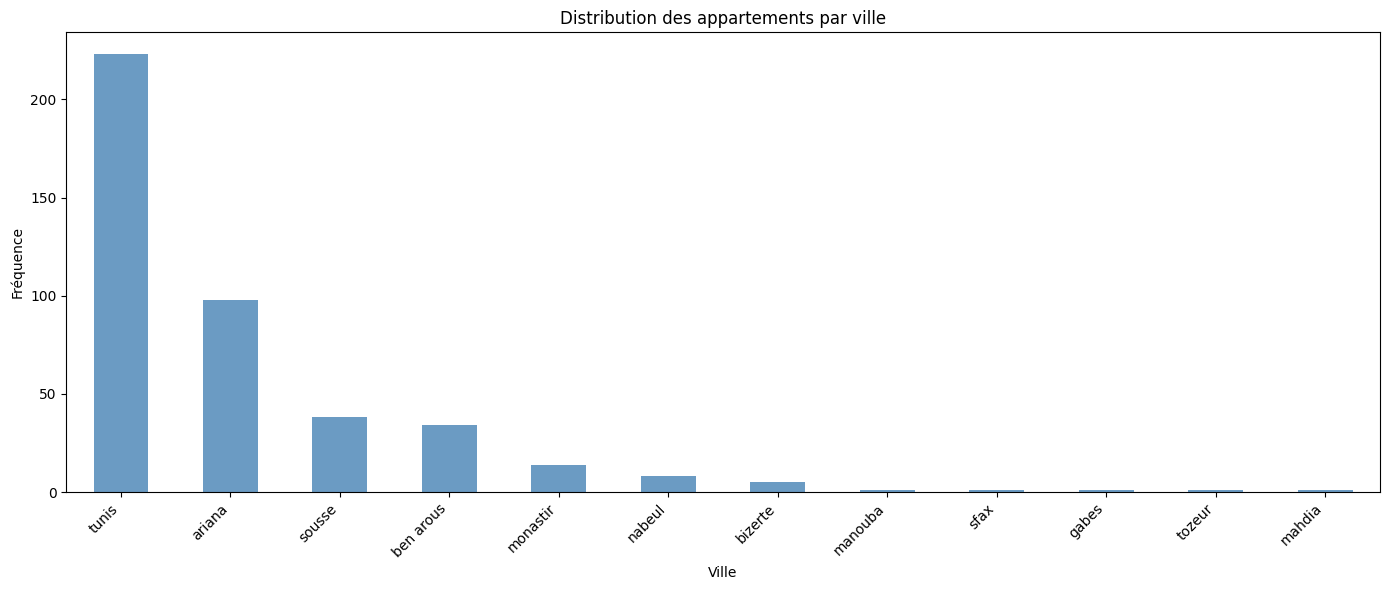

In [115]:
import matplotlib.pyplot as plt
# Bar plot du nombre d'annonces par ville
plt.figure(figsize=(14, 6))
df_final['city'].value_counts().plot(kind='bar', color='steelblue', alpha=0.8)
plt.xlabel('Ville')
plt.ylabel('Fréquence')
plt.title('Distribution des appartements par ville')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

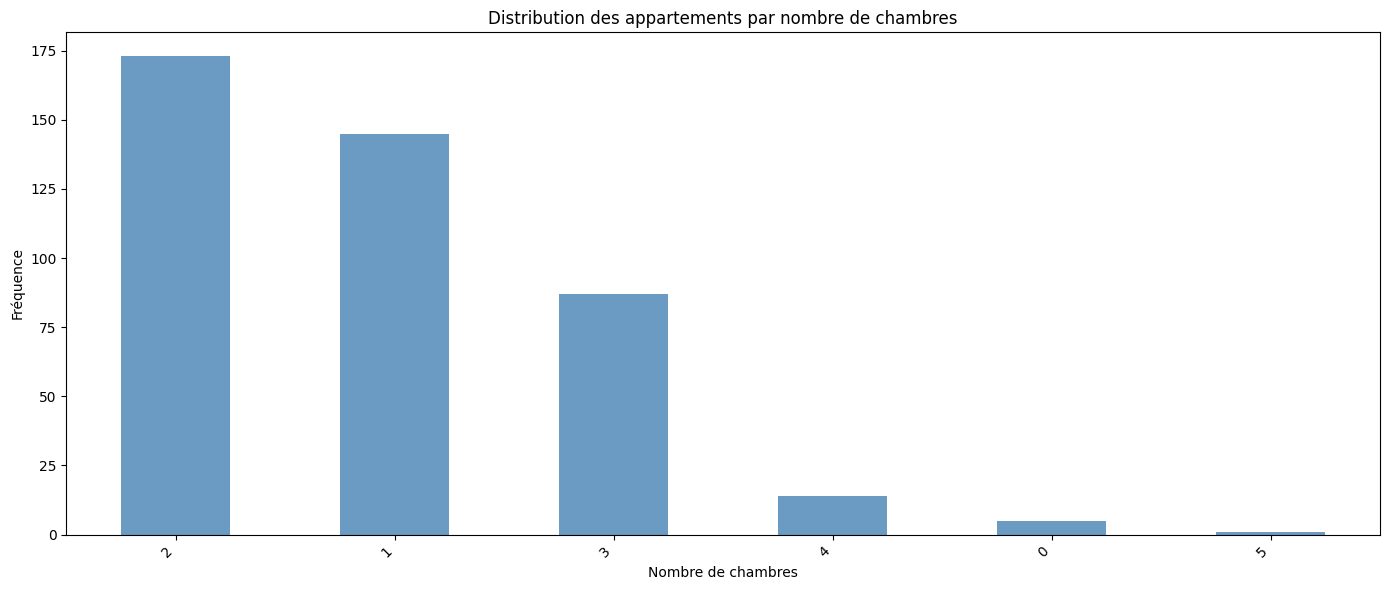

In [125]:
plt.figure(figsize=(14, 6))
df_final['chambres'].value_counts().plot(kind='bar', color='steelblue', alpha=0.8)
plt.xlabel('Nombre de chambres')
plt.ylabel('Fréquence')
plt.title('Distribution des appartements par nombre de chambres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

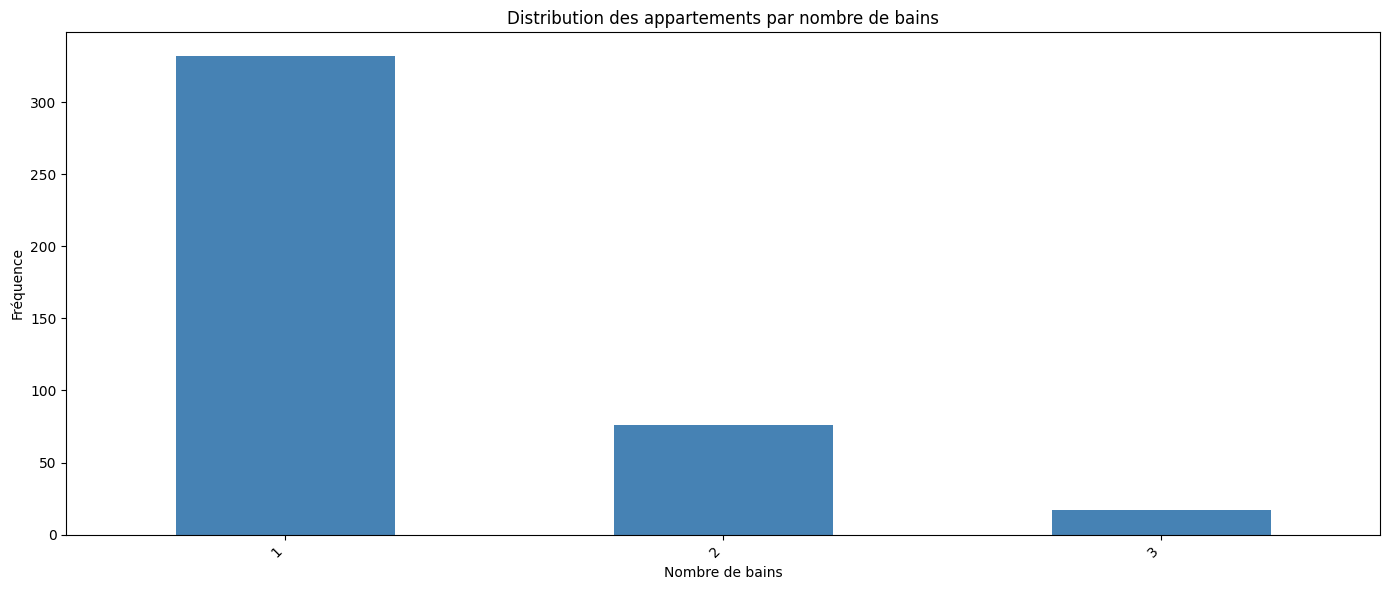

In [129]:
plt.figure(figsize=(14, 6))
df_final['bains'].value_counts().plot(kind='bar', color='steelblue')
plt.xlabel('Nombre de bains')
plt.ylabel('Fréquence')
plt.title('Distribution des appartements par nombre de bains')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

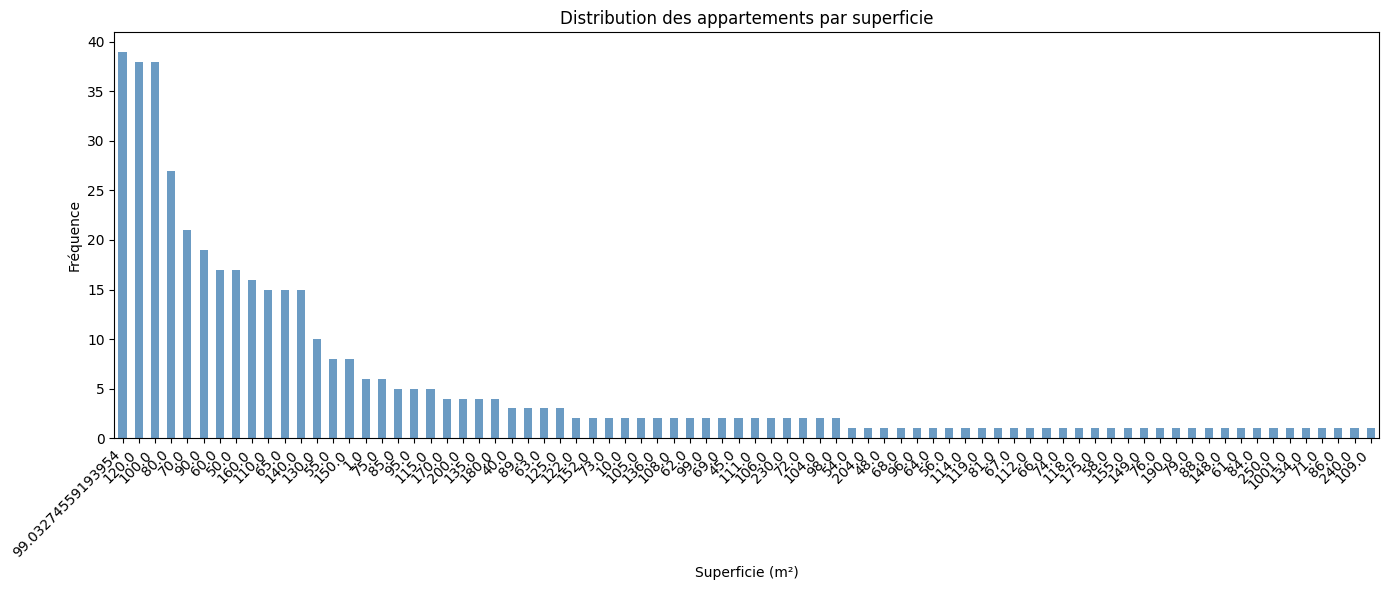

In [130]:
plt.figure(figsize=(14, 6))
df_final['superficie'].value_counts().plot(kind='bar', color='steelblue', alpha=0.8)
plt.xlabel('Superficie (m²)')
plt.ylabel('Fréquence')
plt.title('Distribution des appartements par superficie')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

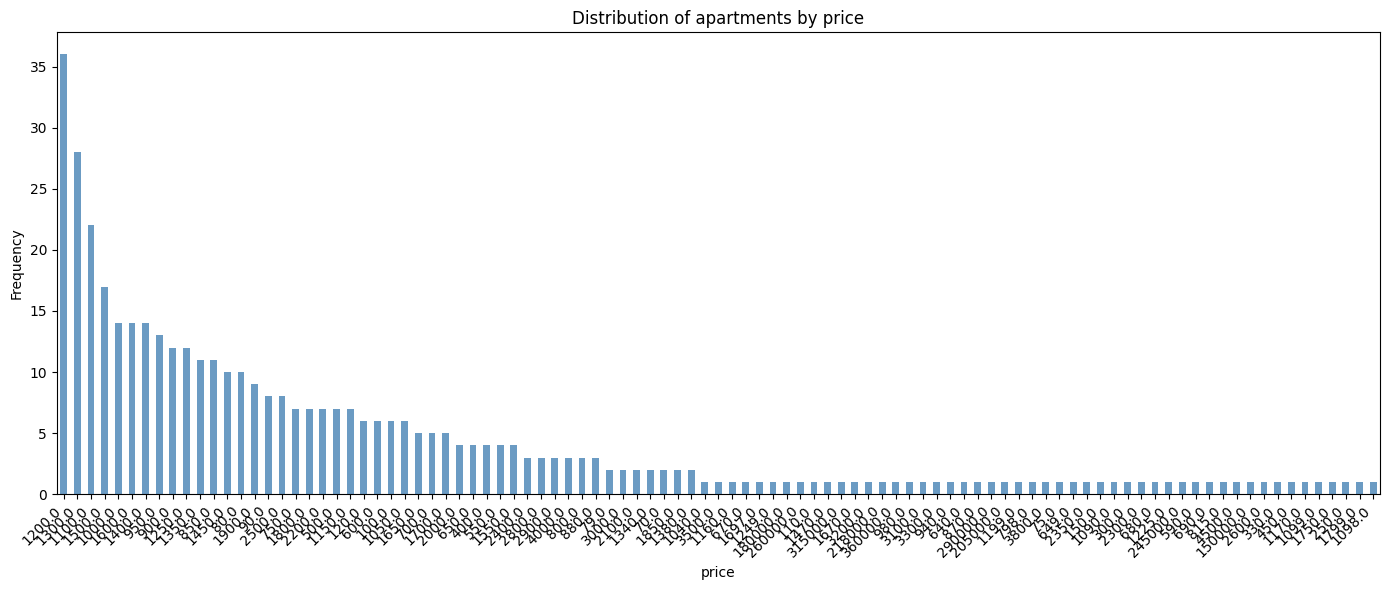

In [161]:
plt.figure(figsize=(14, 6))
df_final['price'].value_counts().plot(kind='bar', color='steelblue', alpha=0.8)
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Distribution of apartments by price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [162]:
df_final[df_final["price"] >= 6000]

,price,city,superficie,bains,chambres
57,180000.0,tunis,54.000000,1,1
167,360000.0,tunis,68.000000,1,1
265,218000.0,tunis,99.032746,1,1
287,260000.0,ariana,72.000000,1,1
435,315000.0,tunis,99.032746,1,2
443,290000.0,tunis,99.032746,2,3
480,205000.0,tunis,99.032746,1,2
957,245000.0,tunis,98.000000,1,2
1123,150000.0,tunis,80.000000,1,2


In [169]:
df_final[df_final["price"] < 300].shape

(38, 5)

In [171]:
def price_correct(price):
    return (price - 0.3*price) * 30

In [172]:
df_final.loc[df_final["price"] < 300, "price"] = df_final.loc[df_final["price"] < 300, "price"].apply(price_correct)

In [173]:
df_final[df_final["price"] < 300].shape

(0, 5)

In [175]:
df_final.loc[df_final["price"] >= 6000, "price"] = df_final.loc[df_final["price"] >= 6000, "price"]//1000

In [176]:
df_final[df_final["price"] >= 6000]

,price,city,superficie,bains,chambres


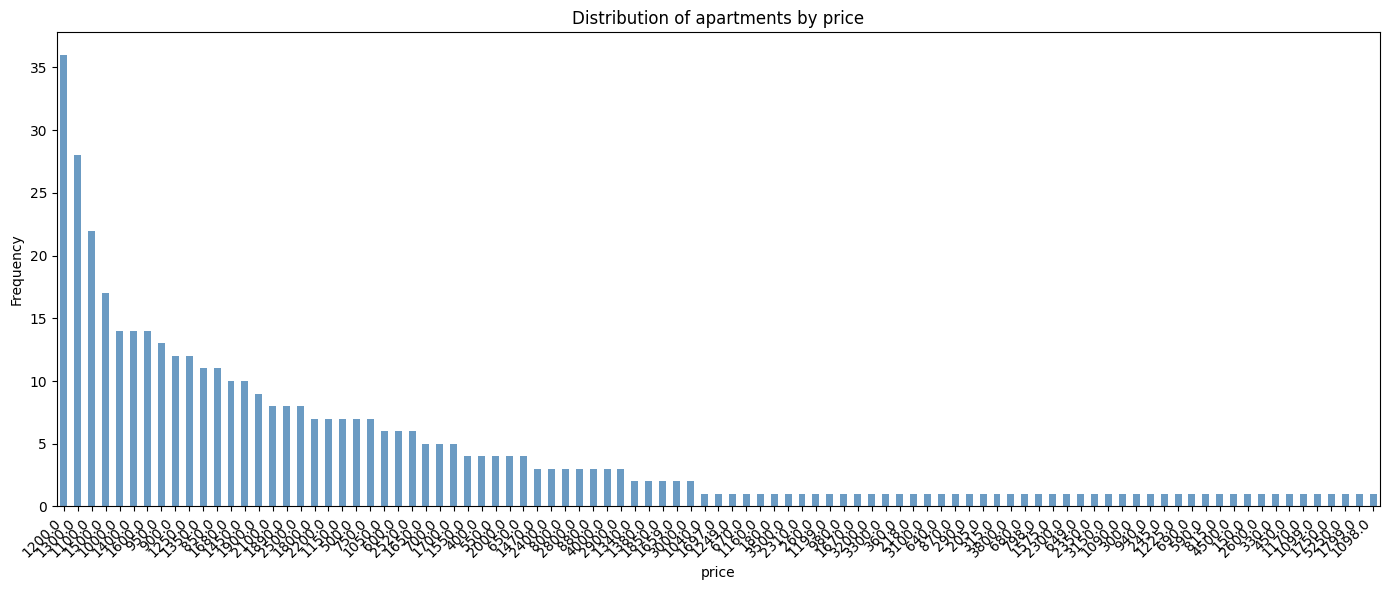

In [177]:
plt.figure(figsize=(14, 6))
df_final['price'].value_counts().plot(kind='bar', color='steelblue', alpha=0.8)
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Distribution of apartments by price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [131]:
df_final.to_csv("immobilier_cleanedV2.csv", index=False)

In [159]:
print("columns:", df_final.columns)
print("head:", df_final.head())
print("describe:", df_final.describe())

columns: Index(['price', 'city', 'superficie', 'bains', 'chambres'], dtype='object')
head:     price    city  superficie  bains  chambres
0  1200.0  ariana       152.0      1         3
3  1200.0   tunis       122.0      1         2
4  1340.0  ariana       136.0      1         3
6  1100.0  ariana       120.0      1         2
7  1300.0  ariana       140.0      1         3
describe:                price   superficie     bains  chambres
count     425.000000   425.000000     425.0     425.0
mean     6444.637647   101.595946  1.258824  1.912941
std     36606.918045    57.753543  0.521991  0.860258
min        70.000000     1.000000       1.0       0.0
25%       900.000000    70.000000       1.0       1.0
50%      1200.000000    99.032746       1.0       2.0
75%      1500.000000   120.000000       1.0       2.0
max    360000.000000  1001.000000       3.0       5.0


# Model generation

### city variable encoding

In [178]:
df_model = pd.get_dummies(df_final, columns=["city"], drop_first=True)

In [179]:
df_model.columns

Index(['price', 'superficie', 'bains', 'chambres', 'city_ben arous',
       'city_bizerte', 'city_gabes', 'city_mahdia', 'city_manouba',
       'city_monastir', 'city_nabeul', 'city_sfax', 'city_sousse',
       'city_tozeur', 'city_tunis'],
      dtype='object')

In [134]:
import unicodedata
import re

def normalize_city(city):
    if not isinstance(city, str):
        return city
    
    # minuscules
    city = city.lower()
    
    # supprimer accents
    city = unicodedata.normalize("NFKD", city)
    city = city.encode("ascii", "ignore").decode("utf-8")
    
    # supprimer les déterminants au début
    city = re.sub(r"^(la |el |al )\s+", "", city)
    
    # supprimer tirets et espaces inutiles
    city = city.replace("-", " ").strip()
    
    return city


In [135]:
df_final["city"] = df_final["city"].apply(normalize_city)

In [97]:
df_final["city"] = df_final["city"].replace({
    "la manouba": "manouba"
})

In [136]:
df_final["city"].value_counts()


city
tunis        223
ariana        98
sousse        38
ben arous     34
monastir      14
nabeul         8
bizerte        5
manouba        1
sfax           1
gabes          1
tozeur         1
mahdia         1
Name: count, dtype: int64

# Split data

In [180]:
from sklearn.model_selection import train_test_split

X = df_model.drop(["price", "superficie"], axis=1)
y = df_model["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 🔵 1) Régression Linéaire

In [181]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

## 🟠 2) Random Forest

In [182]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)
rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=300, random_state=42)

In [183]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Linear Regression
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin)

# Random Forest
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("=== LINEAR REGRESSION ===")
print("MSE :", mse_lin)
print("RMSE :", rmse_lin)
print("R² :", r2_lin)

print("\n=== RANDOM FOREST ===")
print("MSE :", mse_rf)
print("RMSE :", rmse_rf)
print("R² :", r2_rf)


=== LINEAR REGRESSION ===
MSE : 557600.5232233794
RMSE : 746.7265384485671
R² : 0.028839702532501676

=== RANDOM FOREST ===
MSE : 582427.1604371857
RMSE : 763.169155847631
R² : -0.01440029344579985


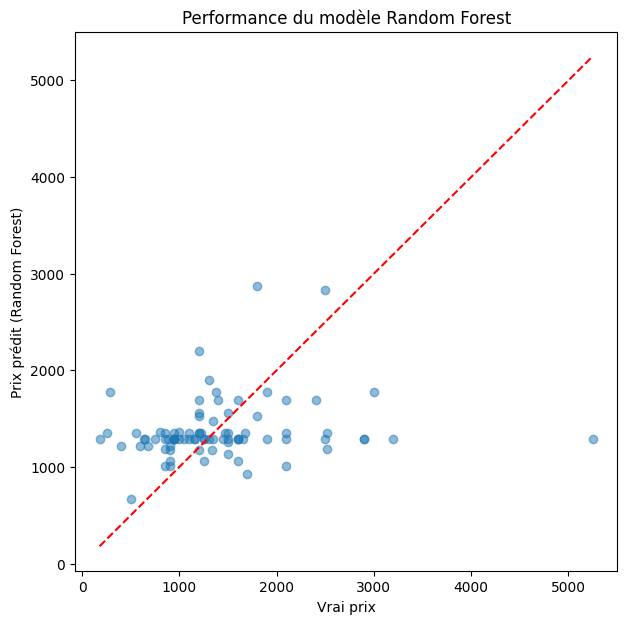

In [184]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Vrai prix")
plt.ylabel("Prix prédit (Random Forest)")
plt.title("Performance du modèle Random Forest")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.show()

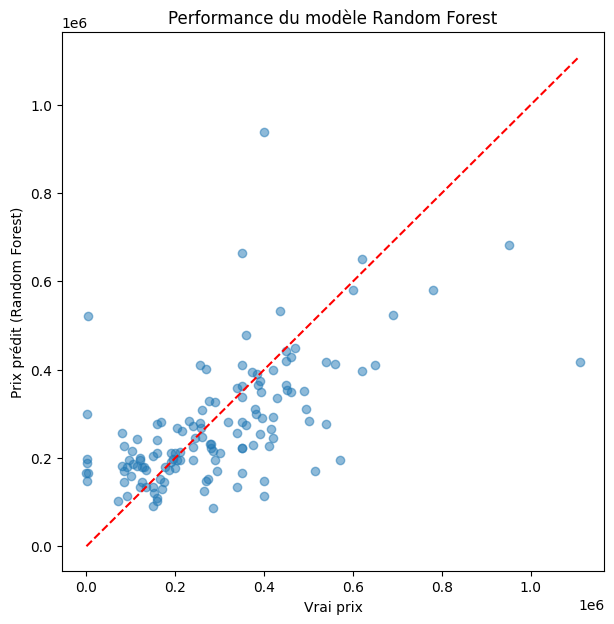

In [268]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Vrai prix")
plt.ylabel("Prix prédit (Random Forest)")
plt.title("Performance du modèle Random Forest")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.show()


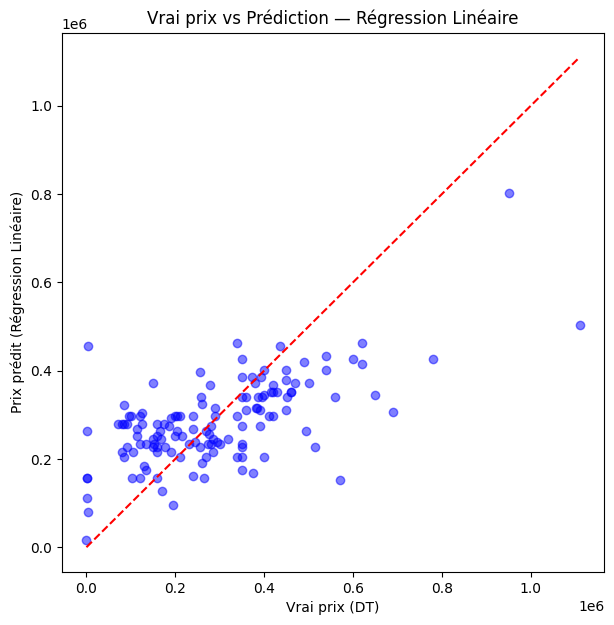

In [270]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_lin, alpha=0.5, color='blue')
plt.xlabel("Vrai prix (DT)")
plt.ylabel("Prix prédit (Régression Linéaire)")
plt.title("Vrai prix vs Prédiction — Régression Linéaire")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--")  # Ligne parfaite
plt.show()


In [147]:
df_model.columns

Index(['price', 'superficie', 'bains', 'chambres', 'city_ben arous',
       'city_bizerte', 'city_gabes', 'city_mahdia', 'city_manouba',
       'city_monastir', 'city_nabeul', 'city_sfax', 'city_sousse',
       'city_tozeur', 'city_tunis'],
      dtype='object')

In [150]:
X.columns

Index(['bains', 'chambres', 'city_ben arous', 'city_bizerte', 'city_gabes',
       'city_mahdia', 'city_manouba', 'city_monastir', 'city_nabeul',
       'city_sfax', 'city_sousse', 'city_tozeur', 'city_tunis'],
      dtype='object')

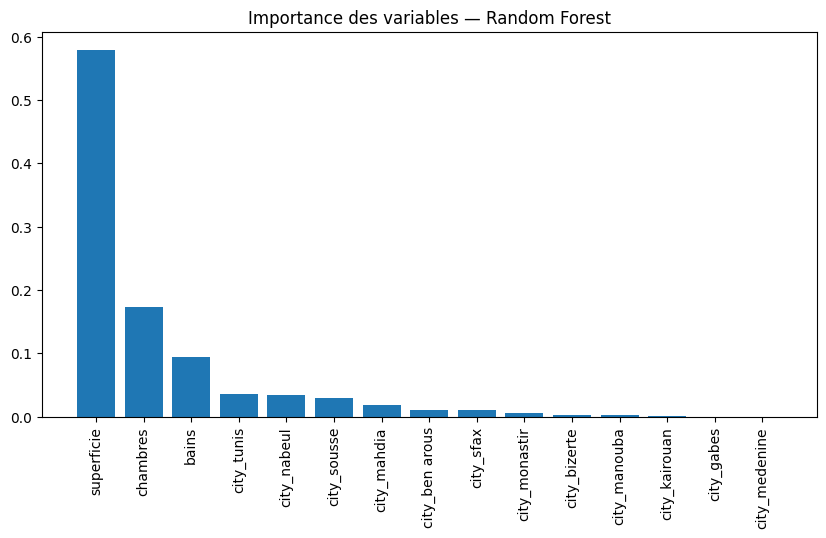

In [271]:
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.title("Importance des variables — Random Forest")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

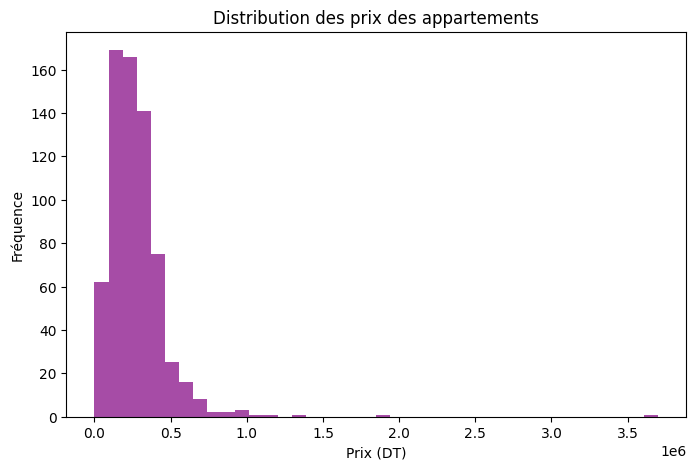

In [272]:
plt.figure(figsize=(8,5))
plt.hist(df_final["price"], bins=40, color='purple', alpha=0.7)
plt.xlabel("Prix (DT)")
plt.ylabel("Fréquence")
plt.title("Distribution des prix des appartements")
plt.show()


In [269]:
df_final["price"].describe()


count    6.740000e+02
mean     2.746270e+05
std      2.202291e+05
min      9.000000e+01
25%      1.610000e+05
50%      2.500000e+05
75%      3.500000e+05
max      3.700000e+06
Name: price, dtype: float64

In [253]:
df_final["price"].sort_values(ascending=False).head(20)

4176    3700000.0
4361    1900000.0
1686    1300000.0
3018    1150000.0
2817    1110000.0
2776     980000.0
2303     950000.0
1789     950000.0
2338     900000.0
135      860000.0
1590     780000.0
3952     750000.0
2403     740000.0
527      700000.0
3926     690000.0
1753     680000.0
3499     650000.0
2574     650000.0
3700     650000.0
3866     650000.0
Name: price, dtype: float64

In [251]:
df_final.loc[2817,"price"] = 1110000

# Deploiment

In [275]:
import joblib

joblib.dump(lin_reg, "model.pkl")
joblib.dump(list(X.columns), "features.pkl")

['features.pkl']

In [276]:
X

,superficie,bains,chambres,city_ben arous,city_bizerte,city_gabes,city_kairouan,city_mahdia,city_manouba,city_medenine,city_monastir,city_nabeul,city_sfax,city_sousse,city_tunis
6,94.0,2,2,False,False,False,False,False,False,False,False,False,False,True,False
10,230.0,2,4,False,False,False,False,False,False,False,False,False,False,False,True
24,120.0,2,2,False,False,False,False,False,False,False,False,False,False,False,True
43,130.0,2,2,False,False,False,False,False,False,False,False,False,False,False,False
45,1.0,1,1,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4413,110.0,2,2,False,False,False,False,False,False,False,False,True,False,False,False
4417,91.0,1,2,False,False,False,False,False,False,False,False,False,False,False,True
4420,53.5,1,-1,False,False,False,False,False,False,False,False,True,False,False,False
4432,426.0,1,2,False,False,False,False,False,False,False,False,True,False,False,False
